In [1]:
import pandas as pd
data  = pd.read_csv("data/sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


In [2]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]), align='left')

In [3]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1)
print(mean2)

209.73713297619855
209.73713297619855


In [4]:
zs = data["lidar"].values
print(zs)

mean = sum(zs)/len(zs)
print(mean)

diff_square = [ (z - mean)**2  for z in zs ]
sampling_var = sum(diff_square)/len(zs)
unbiased_var = sum(diff_square)/(len(zs)-1)
print(sampling_var)
print(unbiased_var)


[214 211 199 ... 204 207 208]
209.73713297619855
23.407709770274106
23.40810659855441


In [5]:
pandas_sampling_var = data["lidar"].var(ddof=0)
pandas_default_var = data["lidar"].var()

print(pandas_sampling_var)
print(pandas_default_var)

23.4077097702742
23.408106598554504


In [6]:
import numpy as np

numpy_default_var =np.var(data["lidar"])
numpy_unbiased_var =np.var(data["lidar"], ddof = 1) #N-1

print(numpy_default_var)
print(numpy_unbiased_var)

23.4077097702742
23.408106598554504


In [7]:
import math

stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.838192492920729


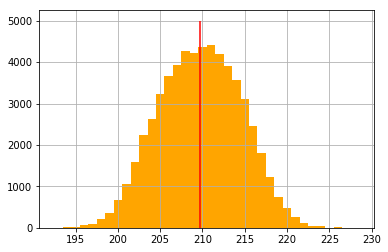

In [8]:
data["lidar"].hist(bins = max(data["lidar"])-min(data["lidar"]), color="orange", align='left')
plt.vlines(mean, ymin=0, ymax=5000, color="red")
plt.show()

In [9]:
print(pd.__version__)

0.23.4


In [10]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [11]:

freqs["probs"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [12]:
sum(freqs["probs"])

1.0

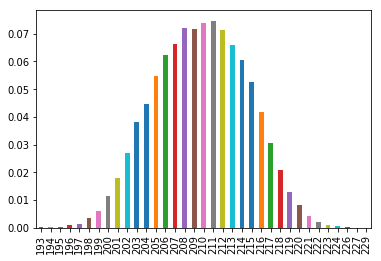

In [13]:
import matplotlib as plt
freqs["probs"].sort_index().plot.bar()


In [14]:
freqs.sample(n=1, weights="probs")

,lidar,probs
213,3897,0.066064


In [15]:
freqs.sample(n=1, weights="probs").index[0]

200

In [16]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]
drawing()

208

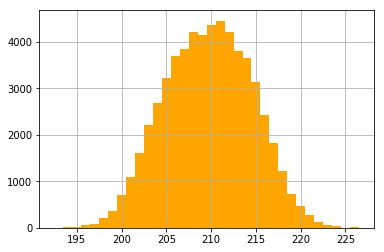

In [21]:
import matplotlib.pyplot as plt
samples =[ drawing() for i in range(len(data)) ]
simulated = pd.DataFrame(samples, columns =["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p), color="orange", align='left')
plt.show()